In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original_df1 = pd.read_csv('../data/raw/spotify_dataset1.csv')
original_df2 = pd.read_csv('../data/raw/spotify_dataset2.csv')
combined_df = pd.read_csv('../data/processed/combined_data.csv')
df = pd.read_csv('../data/processed/processed_data.csv')

/var/folders/30/zl5fslfn5vb5f1_06wdy5p280000gn/T/ipykernel_49563/696420225.py:8: DtypeWarning: Columns (2,6,9,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('../data/processed/combined_data.csv')
/var/folders/30/zl5fslfn5vb5f1_06wdy5p280000gn/T/ipykernel_49563/696420225.py:9: DtypeWarning: Columns (2,6,9,11,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/processed_data.csv')


In [2]:
df.head()

,track_id,artist_name,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_sec
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,"['acoustic', 'j-pop', 'singer-songwriter']",230.666
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,['acoustic'],149.610
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,['acoustic'],210.826
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,['acoustic'],201.933
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,"['country', 'acoustic', 'pop']",198.853


In [3]:
df.columns

Index(['track_id', 'artist_name', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'genre', 'duration_sec'],
      dtype='object')

In [5]:
len(df)

252602

In [16]:
print(combined_df['genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [7]:
df['genre'].value_counts()

genre
['soundtrack']                                                                16919
['comedy']                                                                    10386
['unknown']                                                                    9675
['anime']                                                                      9153
['electronic']                                                                 8862
                                                                              ...  
['grunge', 'alternative', 'psych-rock', 'children’s music']                       1
['blues', 'grunge', 'alternative', 'children’s music']                            1
['grunge', 'power-pop']                                                           1
['hardcore', 'techno', 'hardstyle']                                               1
['folk', 'funk', 'punk', 'dance', 'punk-rock', 'rock', 'children’s music']        1
Name: count, Length: 2009, dtype: int64

In [8]:
df['genre'].head(10)

0    ['acoustic', 'j-pop', 'singer-songwriter']
1                                  ['acoustic']
2                                  ['acoustic']
3                                  ['acoustic']
4                ['country', 'acoustic', 'pop']
5                     ['indie-pop', 'acoustic']
6                      ['acoustic', 'pop-rock']
7                      ['acoustic', 'pop-rock']
8                      ['acoustic', 'pop-rock']
9                                  ['acoustic']
Name: genre, dtype: object

In [10]:
print(type(df['genre'].iloc[0]))

<class 'str'>


In [11]:
df[df['genre'].apply(lambda x: x == ['soundtrack'])]

,track_id,artist_name,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_sec


In [12]:
df[df['genre'].apply(lambda x: 'soundtrack' in x)].head(10)

,track_id,artist_name,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,duration_sec
3463,56oReVXIfUO9xkX7pHmEU0,Max Richter;Louisa Fuller;Natalia Bonner;John ...,The Blue Notebooks (15 Years),On the Nature of Daylight,65,371746,False,0.065,0.34100,10,...,0,0.0482,0.154,0.85400,0.1090,0.0334,65.380,4,"['ambient', 'soundtrack']",371.746
3501,285ieonEuLkll3zknYK2TY,Gustavo Santaolalla,The Last of Us,The Last of Us,61,183533,False,0.574,0.46800,4,...,0,0.0305,0.867,0.92800,0.0980,0.3520,154.626,3,"['ambient', 'soundtrack']",183.533
3595,2IXJyG1DX93g2EhFXghz37,Gustavo Santaolalla;Alan Umstead,The Last of Us,The Choice,56,102373,False,0.303,0.00338,4,...,0,0.0493,0.909,0.89000,0.1160,0.3470,50.960,4,"['ambient', 'classical', 'soundtrack']",102.373
3599,1A8qD0Ygjzsby5OmXh1PTa,Max Richter,Sleep,Dream 1 (before the wind blows it all away) - ...,62,118668,False,0.166,0.00225,6,...,1,0.0507,0.988,0.94600,0.1080,0.0541,69.327,4,"['ambient', 'soundtrack']",118.668
3601,62Da3JOu9H9EIgmqV7DoLG,Clint Mansell;Kronos Quartet,Requiem for a Dream / OST,Lux Aeterna,53,234400,False,0.380,0.24600,7,...,0,0.0329,0.872,0.90500,0.0840,0.0573,133.805,4,"['ambient', 'soundtrack']",234.400
3653,0owIthsU5nNNPLK6MjdVOe,Dario Marianelli,Everest (Original Motion Picture Soundtrack),Someone Loves Us,55,116760,False,0.176,0.00998,4,...,1,0.0456,0.973,0.85400,0.0842,0.0385,83.902,4,"['ambient', 'soundtrack']",116.760
3662,06IHJXjHrz1THZG2dPE1jq,Abel Korzeniowski,Penny Dreadful: Seasons 2 & 3 (Music From The ...,Ethan's Waltz,55,85960,False,0.448,0.14700,11,...,0,0.0279,0.920,0.91200,0.0766,0.2890,144.738,3,"['ambient', 'soundtrack']",85.960
3695,3Za4yViy4wKFEF0gkqCH3j,Gustavo Santaolalla;Diego Luna,The Book of Life (Original Motion Picture Soun...,I Love You Too Much,59,155320,False,0.403,0.25500,0,...,1,0.0428,0.854,0.00001,0.1980,0.2100,206.198,3,"['ambient', 'classical', 'soundtrack']",155.320
3772,2ffwBvpsQhgXyU7zBUOhwP,Max Richter,The Blue Notebooks (15 Years),Written on the Sky,58,100013,False,0.349,0.11900,10,...,0,0.0482,0.993,0.90600,0.1030,0.1810,136.278,3,"['ambient', 'soundtrack']",100.013
3818,3FVy3aVs0TFzLv6FEiLqC2,Max Richter,Sleep,Dream 1 (before the wind blows it all away) - ...,55,153101,False,0.214,0.00144,6,...,1,0.0487,0.995,0.96800,0.0998,0.0866,72.046,4,"['ambient', 'soundtrack']",153.101


In [31]:
print(df[df['track_id']=='03znS0yMUMP9lgtmpjUXJU'])

                      track_id   artist_name                       album_name  \
106998  03znS0yMUMP9lgtmpjUXJU  Mats Rådberg  I'm The Singer, You're The Song   

                   track_name  popularity  duration_ms explicit  danceability  \
106998  Vän på vägen (Conwoy)          35       250367    False         0.612   

        energy key  loudness mode  speechiness  acousticness  \
106998   0.709   5    -7.669    1       0.0437         0.398   

        instrumentalness  liveness  valence    tempo time_signature    genre  
106998          0.000709     0.687    0.806  104.881              4  swedish  


In [15]:
print(df[df['track_name']=='tears in the club'])

                    track_id           artist_name            album_name  \
3203  4hrfgsdCAOW9GYDcpNfCWv  FKA twigs;The Weeknd  Music for Rainy Days   
3204  1djJRLSBe7UKJ7F1p3tidC  FKA twigs;The Weeknd           New Grooves   
3205  2M5t4tdhZ9W3Eys2HDCjbY  FKA twigs;The Weeknd  On Chill - Rap & RnB   
3212  6BrLfEagscVPCOxQa0uNxG  FKA twigs;The Weeknd        20s Love Songs   
3213  4HU70kqhA6tRYl55kUkg0a  FKA twigs;The Weeknd            Good Vibes   
3221  3WB7O03A1THXLWrtAERC3h  FKA twigs;The Weeknd         Hit After Hit   

             track_name  popularity  duration_ms explicit  danceability  \
3203  tears in the club           0       196760     True         0.616   
3204  tears in the club           0       196760     True         0.616   
3205  tears in the club           0       196760     True         0.616   
3212  tears in the club           1       196760     True         0.616   
3213  tears in the club           0       196760     True         0.616   
3221  tears in th

<Axes: >

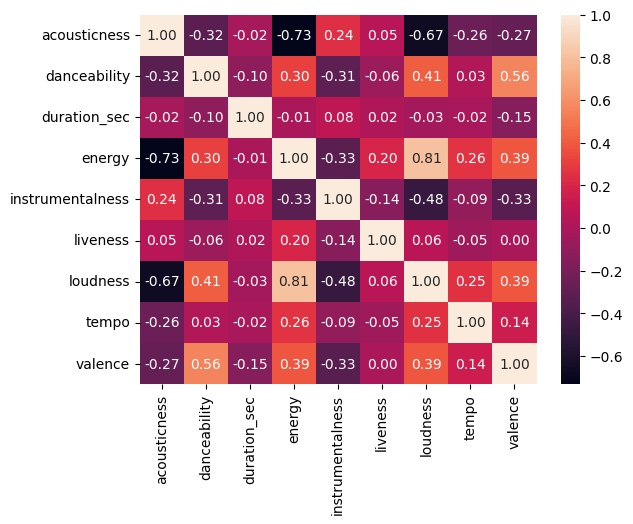

In [14]:
features = ['acousticness', 'danceability', 'duration_sec', 'energy', 
                   'instrumentalness', 'liveness', 'loudness', 'tempo', 'valence']

corr = df[features].corr()
sns.heatmap(corr, annot=True, fmt=".2f")